# City Salary Data Analyis
One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

# Exploration Ideas

* How have salaries changed over time between different groups of people?
* How are base pay, overtime pay, and benefits allocated between   different groups?
* Is there any evidence of pay discrimination based on gender in this dataset?
* How is budget allocated based on different groups and responsibilities?


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Read the data

In [10]:
# read salaries datasets
salaries = pd.read_csv('data/Salaries.csv',low_memory=False)


In [11]:
salaries.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Basic data study

In [12]:
salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [13]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


#### What are your observations about the basic statistics of data?

## What columns do you think do not add value to our analysis? Drop those columns.

In [21]:
for x in salaries:
  print(x,salaries[x].nunique())

Id 148654
EmployeeName 110811
JobTitle 2159
BasePay 109724
OvertimePay 66162
OtherPay 84243
Benefits 98647
TotalPay 138486
TotalPayBenefits 142098
Year 4
Notes 0
Agency 1
Status 2


As 'Id','Notes','Agency' and 'Status' columns are adding no value, we will drop these columns

In [22]:
#Drop unnecessary columns
salaries = salaries.drop(["Id", "Notes", "Status", "Agency"], axis = 1)

In [23]:
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011


## Check for missing values in the data, what is the strategy you will apply to deal with missing values?

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64


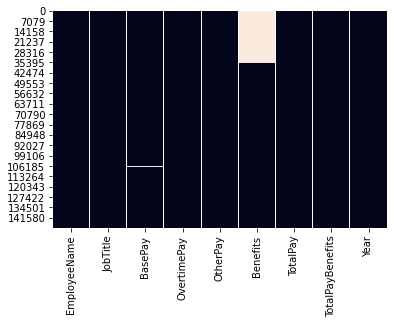

In [35]:
#now, we are checking start with a pairplot, and check for missing values

print(salaries.isnull().sum())
sns.heatmap(salaries.isnull(),cbar=False)


In [37]:
salaries[salaries['Benefits'].isnull()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
36154,SERENA HUGHES,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0.0,0.0,4.17,NaN,4.17,4.17,2011
36155,JOE BROWN JR,TRANSIT OPERATOR,0.0,0.0,0.3,NaN,0.30,0.30,2011
36156,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.00,0.00,2011
36157,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.00,0.00,2011


There is a posibility of people getting zero amount as benefit so, it is better to replace null values with 0.

We can drop the rows with null values in basepay as it can be misleading if there is no basepay information

In [39]:
salaries['Benefits'].fillna(0,inplace = True)

print(salaries.shape)

salaries.dropna(inplace=True)

print(salaries.shape)

salaries.isnull().sum()

(148654, 9)
(148049, 9)


EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

There are a few rows which contain the value 'Not Provided' in most of the columns, delete those rows

## Convert the object values of all the types of pays to numeric, use to_numeric method of pandas to convert. Is it as straightforward or there is some descripency? if yes, how will you overcome it?

In [42]:
salaries[salaries['BasePay'] == "Not Provided"]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014


In [45]:
salaries = salaries[~(salaries['BasePay'] == "Not Provided")]

In [46]:
salaries[salaries['BasePay'] == "Not Provided"]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year


In [50]:
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,0,326373.19,326373.19,2011


In [51]:
for column in salaries[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']]:
  salaries[column] = pd.to_numeric(salaries[column])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148045 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148045 non-null  object 
 1   JobTitle          148045 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148045 non-null  float64
 4   OtherPay          148045 non-null  float64
 5   Benefits          148045 non-null  float64
 6   TotalPay          148045 non-null  float64
 7   TotalPayBenefits  148045 non-null  float64
 8   Year              148045 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 11.3+ MB


## Find the job titles of the 10 highest median base pay

Base Pay -> The most basic sum of money or hourly rate paid to an employee of a business in compensation for their work efforts or time spent on the job

In [53]:
round(salaries.groupby(['JobTitle'])['BasePay'].median(),3).nlargest(10)


JobTitle
Chief of Police                           307450.040
Chief, Fire Department                    302068.000
Gen Mgr, Public Trnsp Dept                294000.180
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000
Mayor                                     281537.170
Dep Dir for Investments, Ret              276153.765
Dept Head V                               270616.270
Adm, SFGH Medical Center                  268946.020
Controller                                267914.000
EXECUTIVE CONTRACT EMPLOYEE               264452.520
Name: BasePay, dtype: float64

## Find the job titles of the 10 highest median Overtime Pay


Overtime Pay -> Additional financial compensation for any hours worked by nonexempt staff over the amount of forty hours per week.

In [54]:
round(salaries.groupby(['JobTitle'])['OvertimePay'].median(),3).nlargest(10)


JobTitle
Wire Rope Cable Maint Sprv                      81313.490
WIRE ROPE CABLE MAINTENANCE SUPERVISOR          66164.730
Trnst Power Line Wrk Sprv 2                     66006.100
Battalion Chief, Fire Suppress                  49833.050
Incident Support Specialist                     46669.885
SENIOR POWER GENERATION TECHNICIAN              46504.350
ASSISTANT INSPECTOR (POLICE DEPARTMENT)         45679.840
MECHANICAL SHOP AND EQUIPMENT SUPERINTENDENT    44930.700
Transit Power Line Sprv1                        44422.370
Asst Chf of Dept (Fire Dept)                    43389.970
Name: OvertimePay, dtype: float64

## Plot the sectors which have provided the maximum  number of employment

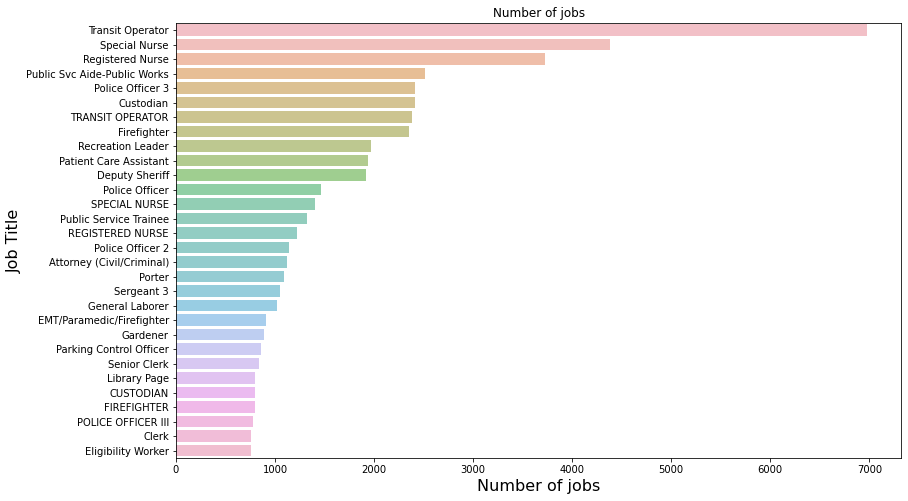

In [55]:
#Top 30 sectors for SF salary analysis
plt.figure(figsize=(13,8))
sectors = salaries['JobTitle'].value_counts()[0:30]
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.xlabel('Number of jobs', fontsize=16)
plt.ylabel("Job Title", fontsize=16)
plt.title("Number of jobs")
plt.show()

## Plot the top 10 Job titles with highest mean TotalPayBenefits

In [56]:
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


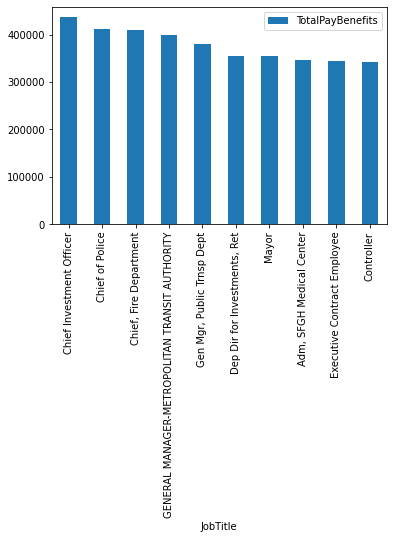

In [80]:
top_mean = salaries.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending = False)[:10].reset_index()

top_mean.plot(x = 'JobTitle',y = 'TotalPayBenefits',kind = 'bar')

## Find the highest paid employees for the year 2012, 2013 and 2014



In [90]:
years = [2012,2013,2014]
for year in years:
  name = salaries[salaries['Year'] == year].sort_values(by = 'TotalPay',ascending = False)['EmployeeName'].iloc[0]
  salary = salaries[salaries['Year'] == year].sort_values(by = 'TotalPay',ascending = False)['TotalPay'].iloc[0]
  print(name,'was the highest paid employee','for the year',year,'with a salary of', salary)


Gary Altenberg was the highest paid employee for the year 2012 with a salary of 362844.66
Samson  Lai was the highest paid employee for the year 2013 with a salary of 347102.32
David Shinn was the highest paid employee for the year 2014 with a salary of 471952.64


## What questions do you want the answer for looking at the data?
